<a href="https://colab.research.google.com/github/dawn699/comp90054/blob/main/problem_set_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP90054 AI Planning for Autonomy
### Problem Set 01 - Blind Search




### Key concepts:
- State-space model
- Blind search algorithms: BFS, DFS and ID


### Set up the environment:
- Please run the following blocks of code to initialise the *environment*

In [3]:
!pip install pydotplus

In [4]:
import numpy as np
import pydotplus
from IPython.display import display, Image
from ipywidgets import interact

In [5]:
# Class of the problem

class Problem():
  initial_state = None
  state_space = None
  goal_states = None
  actions = None
  transition_function = None
  costs = None

  def __init__(self, initial_state, state_space, goal_states, actions, transition_function, costs):
    self.initial_state = initial_state
    self.state_space = state_space
    self.goal_states = goal_states
    self.actions = actions
    self.transition_function = transition_function
    self.costs = costs

    self.current_state = self.initial_state

    return

# Helper function to visualize the problem (i.e. draw state transition graph)
def generate_state_graph(problem):
  state_graph={}
  state_graph['nodes'] = {k:{'label':'\"{}\n{}\"'.format(k,' ')} for k in sorted(list(problem.state_space))}
  state_graph['nodes'][problem.initial_state]['color'] = 'green'
  for goal in problem.goal_states:
      state_graph['nodes'][goal]['shape'] = 'doublecircle'
  state_graph['edge'] = {k:{'label':str(problem.costs[k])} for k in problem.costs.keys()}
  return state_graph

def render_graph(param):
  s = ''
  s += 'digraph G { \n'

  for edge,tdict in param['edge'].items():
    tstr = edge[0] + '->' + edge[1] + ' '
    if bool(tdict):
      tstr += '['
      for k,v in tdict.items():
        tstr += '{}={},'.format(k,v)
      tstr = tstr[:-1] + ']'
    tstr += ';\n'
    s+=tstr

  for node,tdict in param['nodes'].items():
    tstr = node + ' '
    if bool(tdict):
      tstr += '['
      for k,v in tdict.items():
        tstr += '{}={},'.format(k,v)
      tstr = tstr[:-1] + ']'
    tstr += ';\n'
    s+=tstr

  s += ' \n}'

  #print (s)
  graph = pydotplus.graph_from_dot_data(s)
  return graph.create_png()


# Visulize the search process (not required)
def visulize_search_process(nodes,problem):
    progress = []

    for i,(state,value,parent) in enumerate(nodes):
        param = {}
        param['nodes'] = {str(k):{'label':'\"n{}\n{},{},{}\"'.format(k,state,cost,parent)} for k,(state,cost,parent) in enumerate(nodes[:i+1])}

        # The newly generated node is red while all other nodes are green
        for k in param['nodes']:
            param['nodes'][k]['color'] = 'green'
        param['nodes'][str(i)]['color'] = 'red'

        # Black edges
        param['edge'] = {(str(parent), str(k)): {'label': str(problem.costs[(nodes[parent][0], state)])} for k, (state, cost, parent) in enumerate(nodes[:i+1]) if not parent is None}
        for edge in param['edge']:
            param['edge'][edge]['color'] = 'black'

        progress.append(param)

    prog_imgs = [render_graph(param) for param in progress]
    def show_img(idx):
        return display(Image(prog_imgs[idx]))
    interact(show_img,idx=(0,len(prog_imgs)-1,1))







---


### Example:


#### State transition graph:

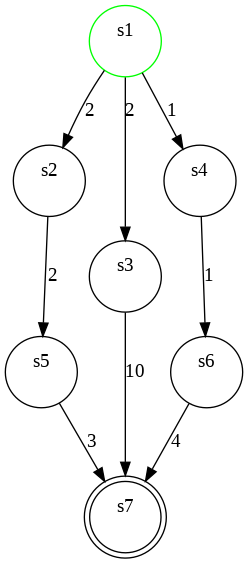


#### Code to auto generate state space model (you don't have to use it)

In [6]:
# Code to auto-generate state space model

states = set(['s{}'.format(i) for i in range(1,8)])
ini_st = 's1'
goal_sts = set(['s7'])

costs = {
    ('s1','s2'):2,
    ('s1','s3'):2,
    ('s1','s4'):1,
    ('s2','s5'):2,
    ('s3','s7'):10,
    ('s4','s6'):1,
    ('s5','s7'):3,
    ('s6','s7'):4,
}


actions = {'s{}'.format(i): set() for i in range(1,8)}
for k1,k2 in costs.keys():
  actions[k1].add((k1,k2))

tranf = {(k[0],k):k[1] for k in costs.keys()}

prob = Problem(initial_state=ini_st, state_space=states, goal_states=goal_sts, actions=actions, transition_function=tranf, costs=costs)

print ('initial_state={}'.format(prob.initial_state))
print ('state_space={}'.format(prob.state_space))
print ('goal_states={}'.format(prob.goal_states))
print ('actions={}'.format(prob.actions))
print ('transition_function={}'.format(prob.transition_function))
print ('costs={}'.format(prob.costs))


initial_state=s1
state_space={'s2', 's4', 's1', 's7', 's5', 's6', 's3'}
goal_states={'s7'}
actions={'s1': {('s1', 's3'), ('s1', 's4'), ('s1', 's2')}, 's2': {('s2', 's5')}, 's3': {('s3', 's7')}, 's4': {('s4', 's6')}, 's5': {('s5', 's7')}, 's6': {('s6', 's7')}, 's7': set()}
transition_function={('s1', ('s1', 's2')): 's2', ('s1', ('s1', 's3')): 's3', ('s1', ('s1', 's4')): 's4', ('s2', ('s2', 's5')): 's5', ('s3', ('s3', 's7')): 's7', ('s4', ('s4', 's6')): 's6', ('s5', ('s5', 's7')): 's7', ('s6', ('s6', 's7')): 's7'}
costs={('s1', 's2'): 2, ('s1', 's3'): 2, ('s1', 's4'): 1, ('s2', 's5'): 2, ('s3', 's7'): 10, ('s4', 's6'): 1, ('s5', 's7'): 3, ('s6', 's7'): 4}


#### Code to define the problem (i.e. state space model)

In [11]:
initial_state = 's1'
state_space = {'s3', 's5', 's1', 's2', 's4', 's7', 's6'}
goal_states = {'s7'}
actions = {'s1': {('s1', 's3'), ('s1', 's2'), ('s1', 's4')}, 's2': {('s2', 's5')}, 's3': {('s3', 's7')}, 's4': {('s4', 's6')}, 's5': {('s5', 's7')}, 's6': {('s6', 's7')}, 's7': set()}
transition_function = {('s1', ('s1', 's2')): 's2', ('s1', ('s1', 's3')): 's3', ('s1', ('s1', 's4')): 's4', ('s2', ('s2', 's5')): 's5', ('s3', ('s3', 's7')): 's7', ('s4', ('s4', 's6')): 's6', ('s5', ('s5', 's7')): 's7', ('s6', ('s6', 's7')): 's7'}
costs = {('s1', 's2'): 2, ('s1', 's3'): 2, ('s1', 's4'): 1, ('s2', 's5'): 2, ('s3', 's7'): 10, ('s4', 's6'): 1, ('s5', 's7'): 3, ('s6', 's7'): 4}

problem = Problem(initial_state, state_space, goal_states, actions, transition_function, costs)

#### Generate the state transition graph for the problem:

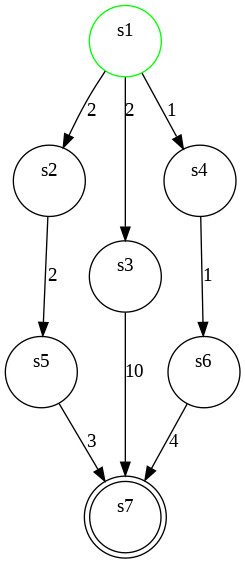

In [12]:
display(Image(render_graph(generate_state_graph(problem))))

---


### Problem 1:


Following the above example, define the state-space model of the graph:

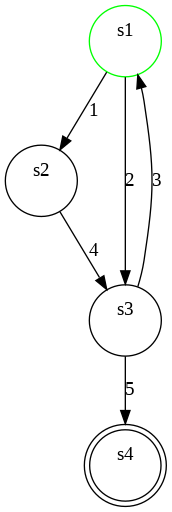

#### Task 1: please complete the following code:

In [9]:
# initial_state=
# state_space={}
# goal_states={}
# actions={}
# transition_function={}
# costs={}

initial_state = 's1'

state_space = {'s1', 's2', 's3', 's4'}

goal_states = {'s4'}

actions = {
    's1': {('s1', 's2'), ('s1', 's3')},
    's2': {('s2', 's3')},
    's3': {('s3', 's1'), ('s3', 's4')},
    's4': set()
}

transition_function = {
    ('s1', ('s1', 's2')): 's2',
    ('s1', ('s1', 's3')): 's3',
    ('s2', ('s2', 's3')): 's3',
    ('s3', ('s3', 's1')): 's1',
    ('s3', ('s3', 's4')): 's4'
}

costs = {
    ('s1', 's2'): 1,
    ('s1', 's3'): 2,
    ('s3', 's1'): 3,
    ('s2', 's3'): 4,
    ('s3', 's4'): 5
}

problem1 = Problem(initial_state, state_space, goal_states, actions, transition_function, costs)

#### Task 2: try to visulize the state transition graph of your model:

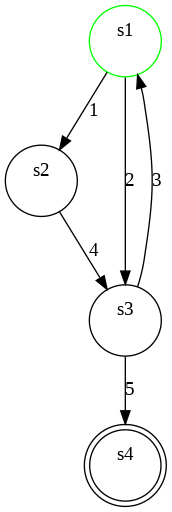

In [10]:
display(Image(render_graph(generate_state_graph(problem1))))

### Problem 2

Run three common blind search algorithms (i.e. BFS, DFS and ID) on the given state space model from the Example. What's the difference between the **state transition graph** and the **search tree** generated during the search process？



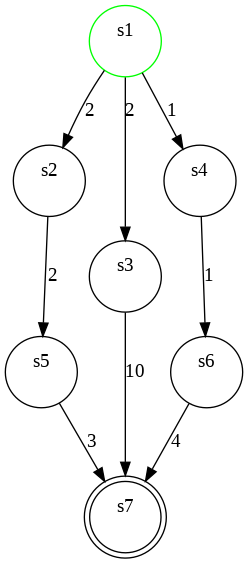


#### Task 1:
Discuss with others, and finish the node expansion order for each algorithm:

##### BrFS(Breadth First Search):


In [21]:
# #  Expansion node order
# nodes = [ # (state, accumulated cost -> g(n), id of parent node)
#       ('s1',0,None),
#       ('s2',2,0)
# ]

nodes = [  # (state, accumulated cost -> g(n), id of parent node)
    ('s1', 0, None),   # 起点
    ('s2', 2, 0),      # s1 -> s2
    ('s3', 2, 0),      # s1 -> s3
    ('s4', 1, 0),      # s1 -> s4
    ('s5', 4, 1),      # s2 -> s5
    ('s7', 12, 2),     # s3 -> s7
    ('s6', 2, 3),      # s4 -> s6
    ('s7', 7, 4),      # s5 -> s7
    ('s7', 6, 6)       # s6 -> s7
]



In [22]:
visulize_search_process(nodes,problem)

interactive(children=(IntSlider(value=4, description='idx', max=8), Output()), _dom_classes=('widget-interact'…

##### DFS(Depth First Search):

In [28]:
# #  Expansion node order
# nodes = [ # (state, accumulated cost, id of parent node)
#       ('s1',0,None)
# ]

nodes = [
    ('s1', 0, None),         # 0 起点
    ('s2', 2, 0),            # 1 s1 → s2
    ('s5', 4, 1),            # 2 s2 → s5
    ('s7', 7, 2),            # 3 s5 → s7

    ('s3', 2, 0),            # 4 s1 → s3（回溯）
    ('s7', 12, 4),           # 5 s3 → s7

    ('s4', 1, 0),            # 6 s1 → s4（回溯）
    ('s6', 2, 6),            # 7 s4 → s6
    ('s7', 6, 7),            # 8 s6 → s7
]



In [29]:
visulize_search_process(nodes,problem)

interactive(children=(IntSlider(value=4, description='idx', max=8), Output()), _dom_classes=('widget-interact'…

##### ID(Iterative Deepening):

In [35]:
# #  Expansion node order
# nodes = [ # (state, accumulated cost, id of parent node)
#       ('s1',0,None),
#       ('s1',0,None)
# ]

nodes = [
    # depth = 0
    ('s1', 0, None),           # 0

    # depth = 1
    ('s1', 0, None),           # 1
    ('s2', 2, 1),              # 2
    ('s3', 2, 1),              # 3
    ('s4', 1, 1),              # 4

    # depth = 2
    ('s1', 0, None),           # 5
    ('s2', 2, 5),              # 6
    ('s5', 4, 6),              # 7
    ('s3', 2, 5),              # 8
    ('s7', 12, 8),             # 9 ✅ s3→s7
    ('s4', 1, 5),              # 10
    ('s6', 2, 10),             # 11

    # depth = 3
    ('s1', 0, None),           # 12
    ('s2', 2, 12),             # 13
    ('s5', 4, 13),             # 14
    ('s7', 7, 14),             # 15 ✅ s1→s2→s5→s7
    ('s3', 2, 12),             # 16
    ('s7', 12, 16),            # 17 ✅ s1→s3→s7
    ('s4', 1, 12),             # 18
    ('s6', 2, 18),             # 19
    ('s7', 6, 19),             # 20 ✅ 最优路径 s1→s4→s6→s7
]



In [36]:
visulize_search_process(nodes,problem)

interactive(children=(IntSlider(value=10, description='idx', max=20), Output()), _dom_classes=('widget-interac…

#### Task 2:

##### Q1: What is the solution found by each algorithm?

Both s1 → s4 → s6 → s7

##### Q2: What is the actual optimal solution?

s1 → s4 → s6 → s7

##### Q3: Explain under which conditions the algorithms guarantee optimality?

BFS 和 ID 只在 单位代价 或 路径长度等于总代价 时才保证最优。

DFS 永远不保证最优，因为它可能先走到一个远路。


##### Q4: Can any of the previous algorithms be adapted to account for $g(n)$ in order to make it optimal?

BFS 可以改为考虑 g(n)，变成 Uniform Cost Search（统一代价搜索），从而在任意代价图中保证找到最优解。
修改方式是将原本的先进先出队列改为按累计代价 g(n) 升序排列的优先队列，每次扩展总代价最小的路径。

DFS 无法有效地改为考虑 g(n)，因为它本质是沿某一条路径一直深入到底，不考虑路径代价。
即使尝试引入代价，也无法保证最优路径，且会失去 DFS 的“深度优先”特性。

ID（迭代加深）理论上可以改为考虑 g(n)，但效率非常低。
如果通过设定逐步递增的代价阈值来控制每轮搜索深度（称为代价迭代加深），可以找到最优解，但这种做法比 UCS 要慢很多，因此在实践中很少使用。



### Problem 3:


Describe a simple example of *Travelling Salesman Problem* along with its corresponding **State Space Model**.



Definition should be brief, clear, and
*compact* (*compact* means using mathematical notation to
  define sets, i.e. $S = \{ x | x \in V \}$ to define that there are
  as many states as elements in the set $V$, and pseudo-code, i.e. to
  define the transition function.)

1. State space $S$
2. Initial state $s_0 \in S$
3. Set of goal states  $S_G \subseteq S$
4. Applicable actions function $A(s)$ for each state $s \in S$
5. Transition function $f(s,a)$ for $s \in S$ and $a \in A(s)$
6. Cost of each action $c(a)$ for $a \in A(s)$

**Hint**: Consider a set of cities $V$ to visit in any order, a starting city location $v_{start}$, and a set of edges $E$ specifying if there's an edge from two cities $\langle v_1, v_2 \rangle$.
Let $V'$ be the set of cities has been visited.



下面给出一个简单的三城问题（Cities $V=\{A,B,C\}$，起点 $v_{\text{start}}=A$，距离函数 $d:V\times V\to\mathbb R^+$）的状态空间模型，按题目要求逐项用数学符号和伪代码紧凑地描述。

---

1. **状态空间**

$$
S = \bigl\{(v,\,V') \mid v\in V,\;V'\subseteq V,\;v\in V'\bigr\}.
$$

每个状态 $s=(v,V')$ 表示当前在城市 $v$，且已访问过的城市集合为 $V'$。

2. **初始状态**

$$
s_0 = (\,A,\;\{A\}\,).
$$

3. **目标状态集**

$$
S_G = \{(A,\,V)\},
$$

即回到起点 $A$ 且已访问所有城市。

4. **可用动作**
   对任意 $s=(v,V')$，定义

$$
A(s)=
\begin{cases}
\{\mathrm{move}(u)\mid u\in V\setminus V'\}, & V'\neq V,\\
\{\mathrm{return}\}, & V'=V.
\end{cases}
$$

5. **转移函数**

```plain
f((v, V'), action) =
  if action = move(u):
    → (u, V' ∪ {u})
  if action = return:
    → (A, V)
```

6. **动作代价**

$$
c\bigl(\mathrm{move}(u)\bigr)=d(v,u),
\quad
c(\mathrm{return})=d(v,A).
$$

---

这样，每一步“move”将当前城市从 $v$ 转到一个未访问的城市 $u$，并把它加入已访问集合；当所有城市都访问过时，用“return”回到起点，完成一次循环旅行。


### Challenge Problem 1:

Review problem 2, instead of manual input the node expansion order, now you can try to implement those blind search algorithm on your own.

#### State transition graph:

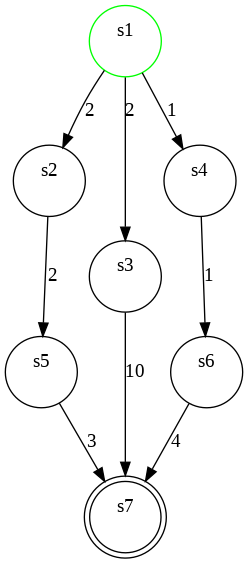


#### Algorithm Implementation: BFS

In [13]:
# Instead of return the final solution, your function here should append the node when it gets expanded, and return the expanded list
# def BFS(problem):
#     expansion_order = []
#     # Your code here:


#     return expansion_order

from collections import deque

def BFS(problem):
    frontier = deque()  # queue for BFS
    explored = set()    # track visited states
    expansion_order = []  # to store (state, cost, parent_index)

    # 初始化：初始状态加入队列，代价为0，parent为None
    frontier.append((problem.initial_state, 0, None))

    while frontier:
        state, cost, parent = frontier.popleft()

        if state in explored:
            continue

        index = len(expansion_order)  # 当前节点的索引
        expansion_order.append((state, cost, parent))
        explored.add(state)

        # 扩展当前状态可执行的动作
        for action in problem.actions[state]:
            next_state = problem.transition_function[(state, action)]
            if next_state not in explored:
                new_cost = cost + problem.costs[(state, next_state)]
                frontier.append((next_state, new_cost, index))  # index 作为 parent

    return expansion_order


In [14]:
visulize_search_process(BFS(problem),problem)

interactive(children=(IntSlider(value=3, description='idx', max=6), Output()), _dom_classes=('widget-interact'…

#### Algorithm Implementation: DFS

In [17]:
# # Instead of return the final solution, your function here should append the node when it gets expanded, and return the expanded list
# def DFS(problem):
#     expansion_order = []
#     # Your code here:

#     return expansion_order

def DFS(problem):
    stack = []  # 使用栈实现 DFS
    visited = set()
    expansion_order = []

    # 初始化：起始状态，代价为 0，父节点为 None
    stack.append((problem.initial_state, 0, None))

    while stack:
        state, cost, parent = stack.pop()

        if state in visited:
            continue

        index = len(expansion_order)
        expansion_order.append((state, cost, parent))
        visited.add(state)

        # 动作集是一个集合 of tuples: (s1, s2), (s1, s3), ...
        if state in problem.actions:
            # 为了更直观地可视化搜索顺序，这里我们逆序 push，保持与图中从左到右一致
            for action in sorted(problem.actions[state], reverse=True):
                next_state = problem.transition_function[(state, action)]
                if next_state not in visited:
                    new_cost = cost + problem.costs[(state, next_state)]
                    stack.append((next_state, new_cost, index))

    return expansion_order



In [18]:
visulize_search_process(DFS(problem),problem)

interactive(children=(IntSlider(value=3, description='idx', max=6), Output()), _dom_classes=('widget-interact'…

#### Algorithm Implementation: ID

In [22]:
# # Instead of return the final solution, your function here should append the node when it gets expanded, and return the expanded list
# def ID(problem):
#     expansion_order = []
#     # Your code here:

#     return expansion_order

def ID(problem):
    expansion_order = []

    def DLS(state, cost, parent, depth, visited):
        if depth < 0 or state in visited:
            return
        index = len(expansion_order)
        expansion_order.append((state, cost, parent))
        visited.add(state)

        if state in problem.goal_states:
            return  # 目标状态，终止展开（可选）

        for action in sorted(problem.actions.get(state, []), reverse=True):
            next_state = problem.transition_function[(state, action)]
            if next_state not in visited:
                new_cost = cost + problem.costs[(state, next_state)]
                DLS(next_state, new_cost, index, depth - 1, visited.copy())

    MAX_DEPTH = len(problem.state_space)  # 限制最大搜索层数，避免死循环
    for depth in range(MAX_DEPTH + 1):
        DLS(problem.initial_state, 0, None, depth, set())

        if len(set(state for state, _, _ in expansion_order)) == len(problem.state_space):
            break

    return expansion_order



In [26]:
visulize_search_process(ID(problem),problem)

!pip install nbstripout

interactive(children=(IntSlider(value=5, description='idx', max=11), Output()), _dom_classes=('widget-interact…